In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle charts

mpl.style.use('ggplot') 

import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

import seaborn as sns

import wordcloud 

print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.7.2
Seaborn version:  0.12.2
WordCloud version:  1.9.3


In [4]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [6]:
print(df_can.shape)

(195, 39)


In [7]:
# setting Country as index
df_can.set_index('Country', inplace = True)

# Waffle Charts

In [8]:
# Creating a new dataframe for these countries:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


###### 
Creating `waffle` charts from scratch:

**Step 1.** Determine the proportion of each category with respect to the total

In [9]:
# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

pd.DataFrame({"Categroy Proportion": category_proportions})

,Categroy Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


###### 
**Step 2.** Define the overall size of the `waffle` chart

In [10]:
width = 40  # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


###### 
**Step 3.** Use the proportion of each category to determine it respective number of tiles

In [11]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


###### 
Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles and Sweden will occupy 194 tiles.


**Step 4.** Create a matrix that resembes the `waffle` chart and populate it.

In [12]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)  # Creates a 2D NumPy array (matrix) of dimensions 'height' x 'width', filled with zeros.
                                         # 'dtype = np.uint' specifies that the array elements are of type unsigned integer (i.e. non-negative integers).

# define indices to loop through waffle chart
category_index = 0   # tracks the current category for which tiles are being assigned
tile_index = 0     # tracks the number of tiles assigned so far in the current category

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
# The above nested loop interates over every position in the 'waffle_chart' matrix, where
# 'col' is the column index and 'row' is the row index

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

###### 
**Step 5.** Map the `waffle` chart matrix into a visual


<Figure size 640x480 with 0 Axes>

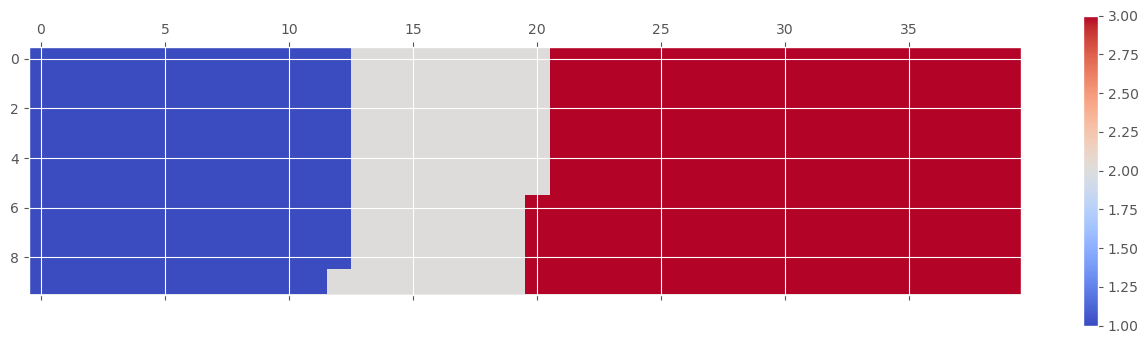

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

###### 
**Step 6.** Prettify the chart

<Figure size 640x480 with 0 Axes>

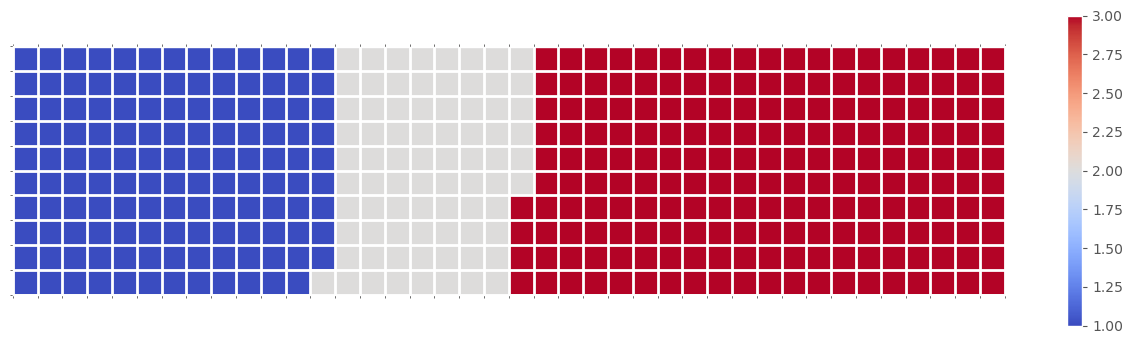

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

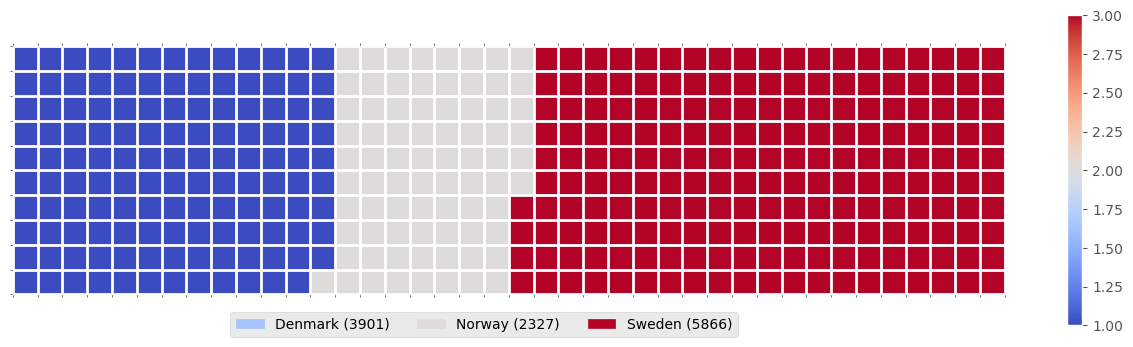

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

###### 
Combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

###### 
Call the function `create_waffle_chart` to create a `waffle` chart

In [18]:
width = 40    # width of chart
height = 10   # height of chart

categories = df_dsn.index.values  # categories
values = df_dsn['Total']          # corresponding values of categories

colormap = plt.cm.coolwarm  # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

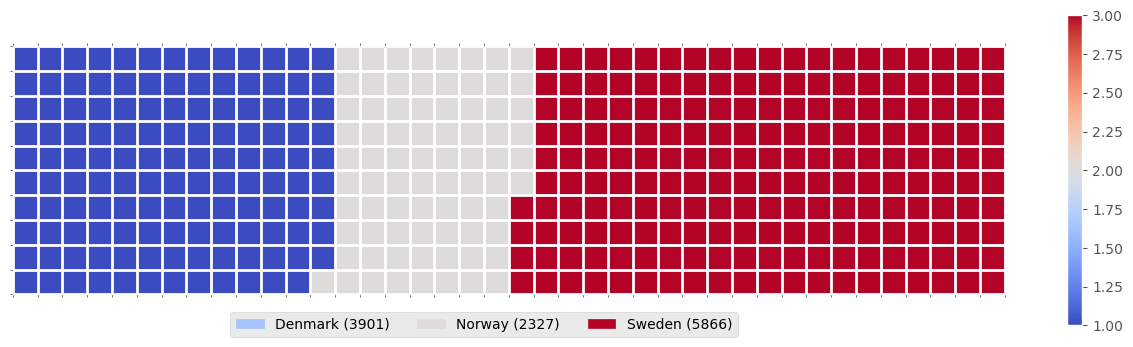

In [19]:
create_waffle_chart(categories, values, height, width, colormap)

###### 
Use the new Python package for generating `waffle charts` called PyWaffle.

Create the same waffle chart with pywaffle now

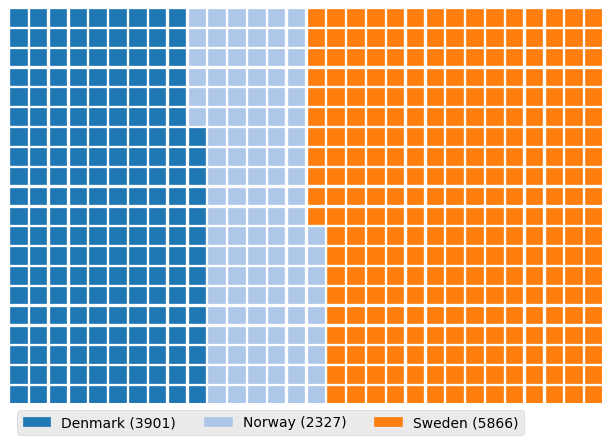

In [20]:
#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

#### Create a Waffle chart to display the proportions of China and India total immigrant contribution

In [21]:
df_CI = df_can.loc[['China', 'India'], :]
df_CI

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


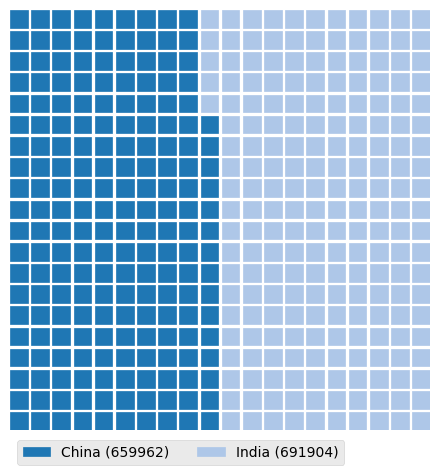

In [22]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 20,
                 values = df_CI['Total'],
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_CI.index.values, df_CI.Total)],
                           'loc': 'lower left', 'bbox_to_anchor':(0,-0.1), 'ncol': 2}
                )
plt.show()

# Word Clouds
A python package exists for generating `word` clouds; it is called `word_cloud` developed by **Andread Mueller**.

In [23]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud imported!')

Wordcloud imported!


###### 
Let's work with an example that involves analyzing text data. Try to analyze a short novel written by Lewis Carroll titled *Alice's Adventures in Wonderland*.

In [24]:
import urllib
import requests

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

###### 
Use the stopwords that was imported from `word_cloud`. Use the function *set* to remove any redundant stopwords

In [25]:
stopwords = set(STOPWORDS)

###### 
Create a word cloud object and generate a word clud.
For simplicity, generate a word cloud using only the first 2000 words in the novel

In [26]:
# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud 
alice_wc.generate(alice_novel)

###### 
Now that the `word` cloud has been created, visualize it:

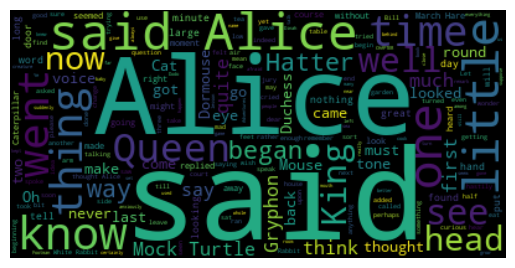

In [27]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### 
Resize the cloud so that we can see the less frequent words a little better

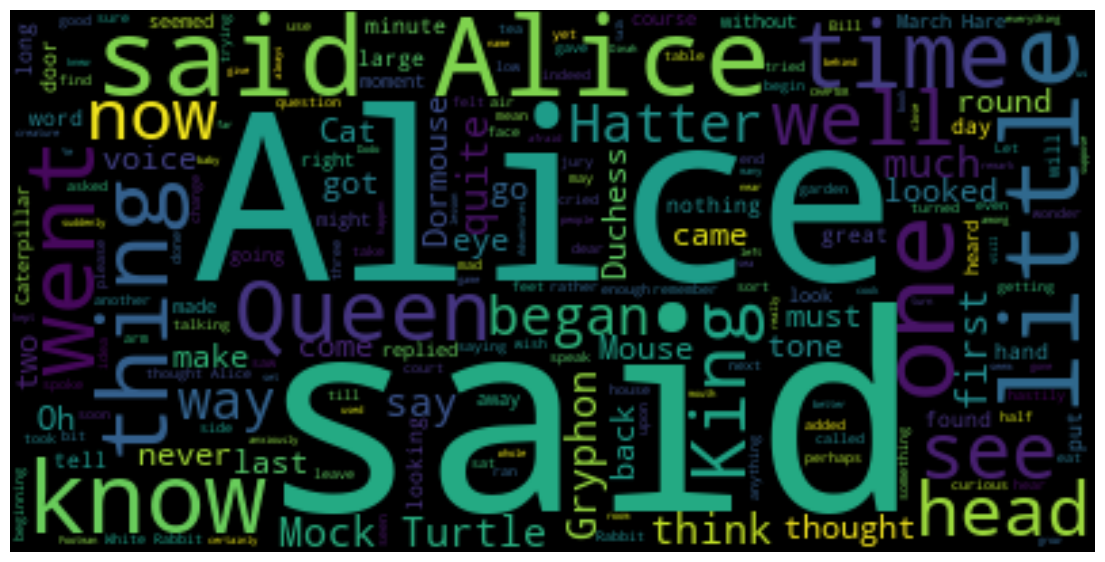

In [28]:
fig = plt.figure (figsize = (14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### 
However, `said` isn't really an informative word. So add it to the stopwords and re-generate the cloud.

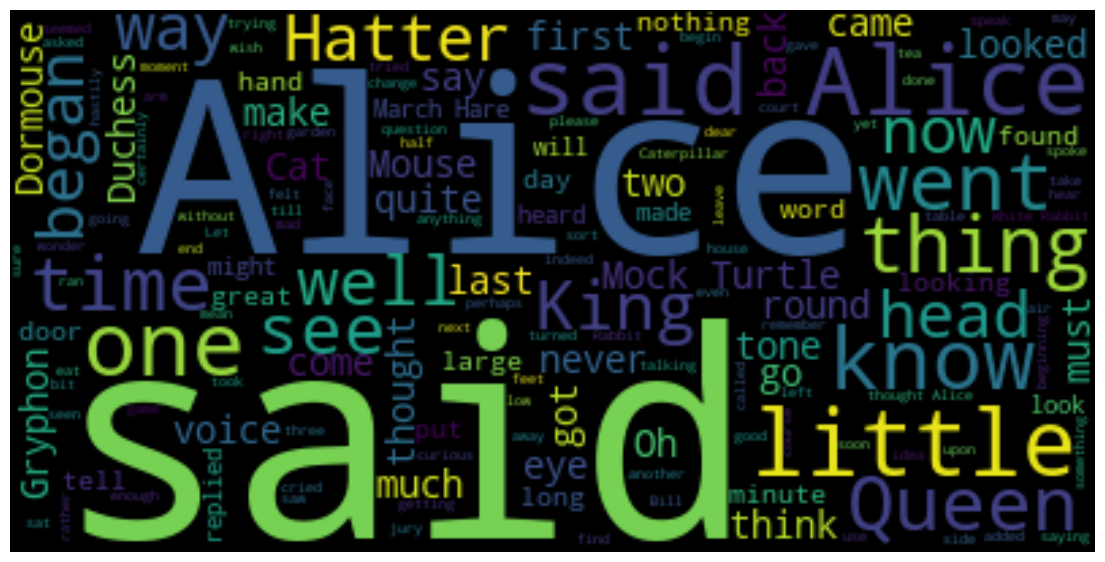

In [29]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

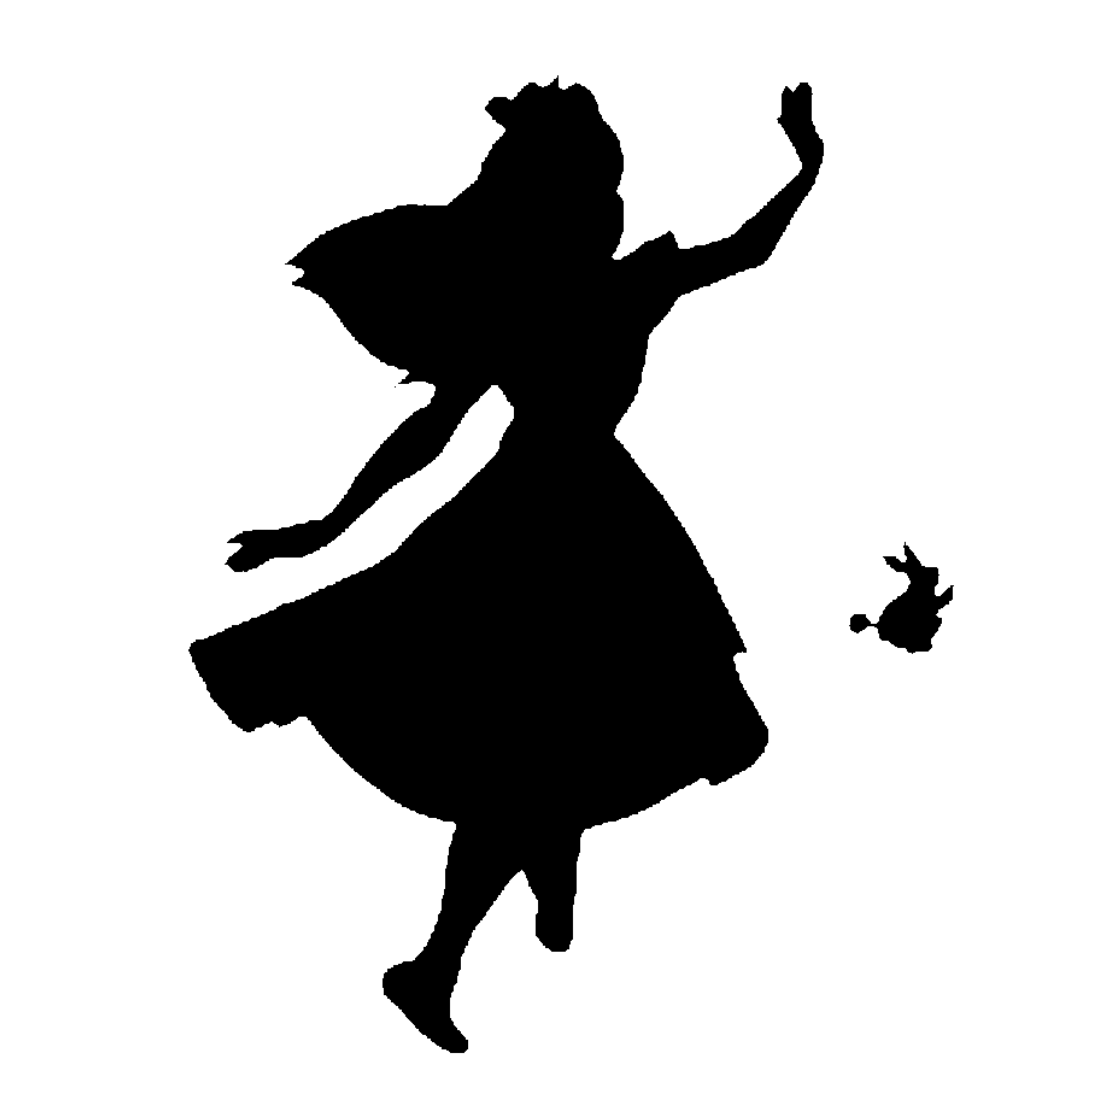

In [31]:
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### 
Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

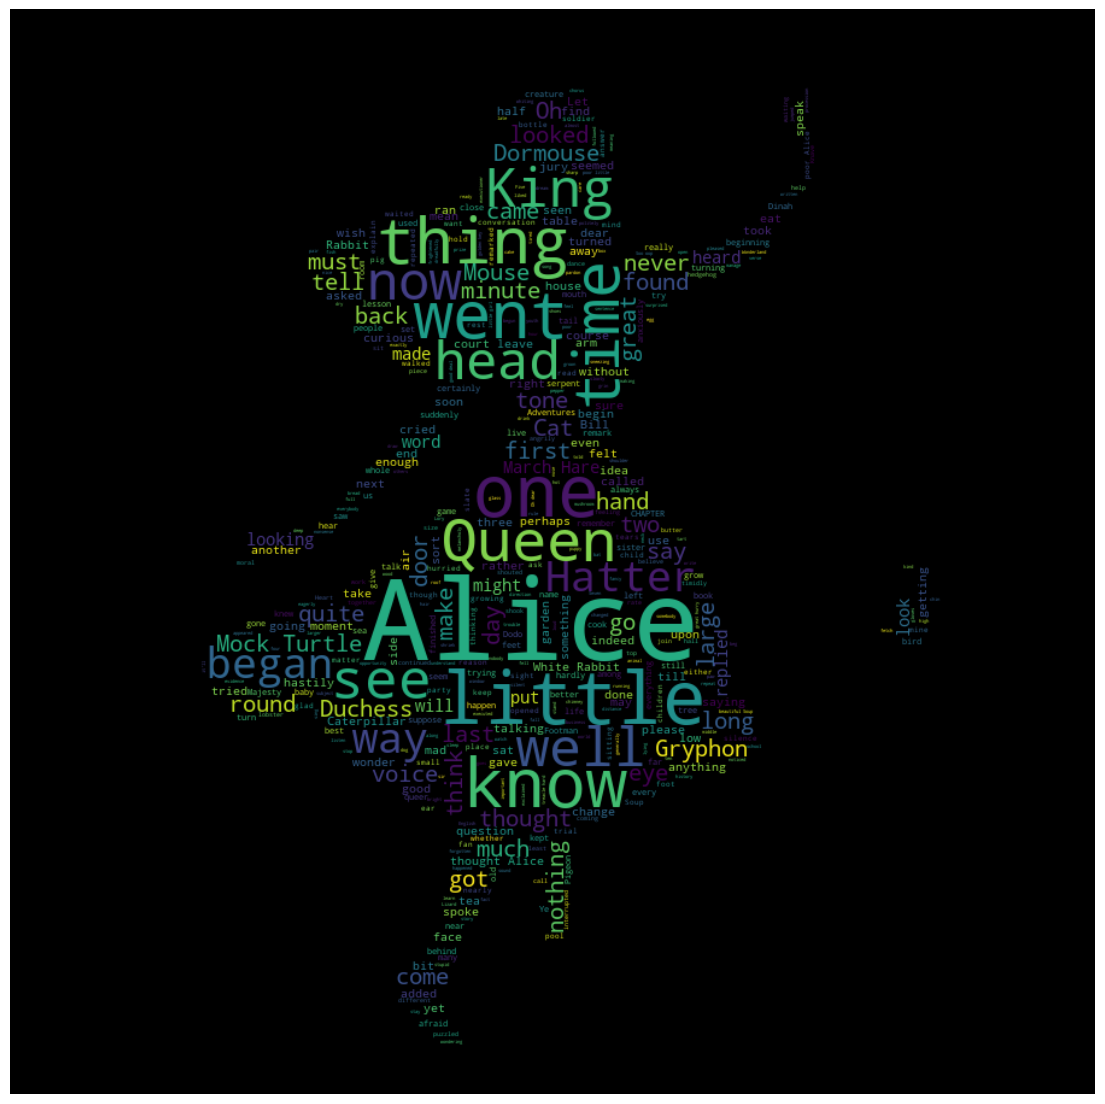

In [36]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color = 'black', max_words=2000, mask = alice_mask, stopwords = stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### 
Generate a sample text data from our immigration dataset. Text data of 90 words

In [37]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [38]:
# The total immigration from 1980 to 2013:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

###### 
Using countries with single-word names, duplicate each country's name based on how much they contribute to the total immigration.


In [39]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

###### 
Since there are no stopwords to deal with here, there will be no need to pass them when creating the word cloud.

In [40]:
# create the word cloud
wordcloud = WordCloud(background_color = 'white').generate(word_string)

print('Word cloud created!')

Word cloud created!


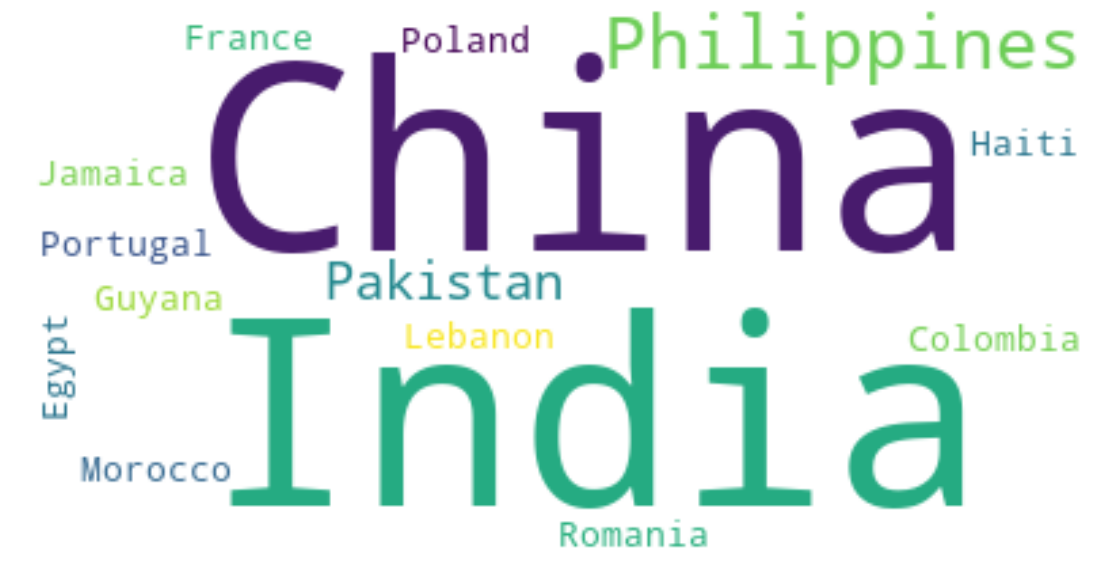

In [41]:
# display the cloud
plt.figure(figsize =(14,18))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Plotting with Seaborn

### Categorical Plots
In the data 'df_can', find out how many continents are mentioned


In [43]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

### countplot
It can be thought of as a histogram across a categorical, instead of quantitative variable.

Find the count of Continents in the data 'df_can' using countplot on 'Continent'

<Axes: xlabel='Continent', ylabel='count'>

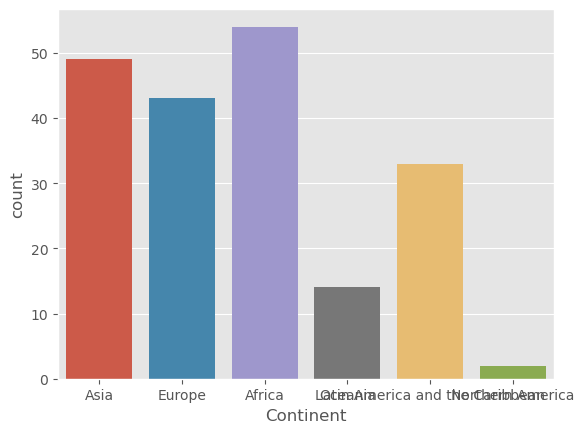

In [44]:
sns.countplot(x= 'Continent', data = df_can)

###### 
Replace the 'Latin America and the Carribean' with an "L-America", "Northern America" with "N-America",
and change the figure size and then display the plot again

In [45]:
df_can1 = df_can.replace ('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northen America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

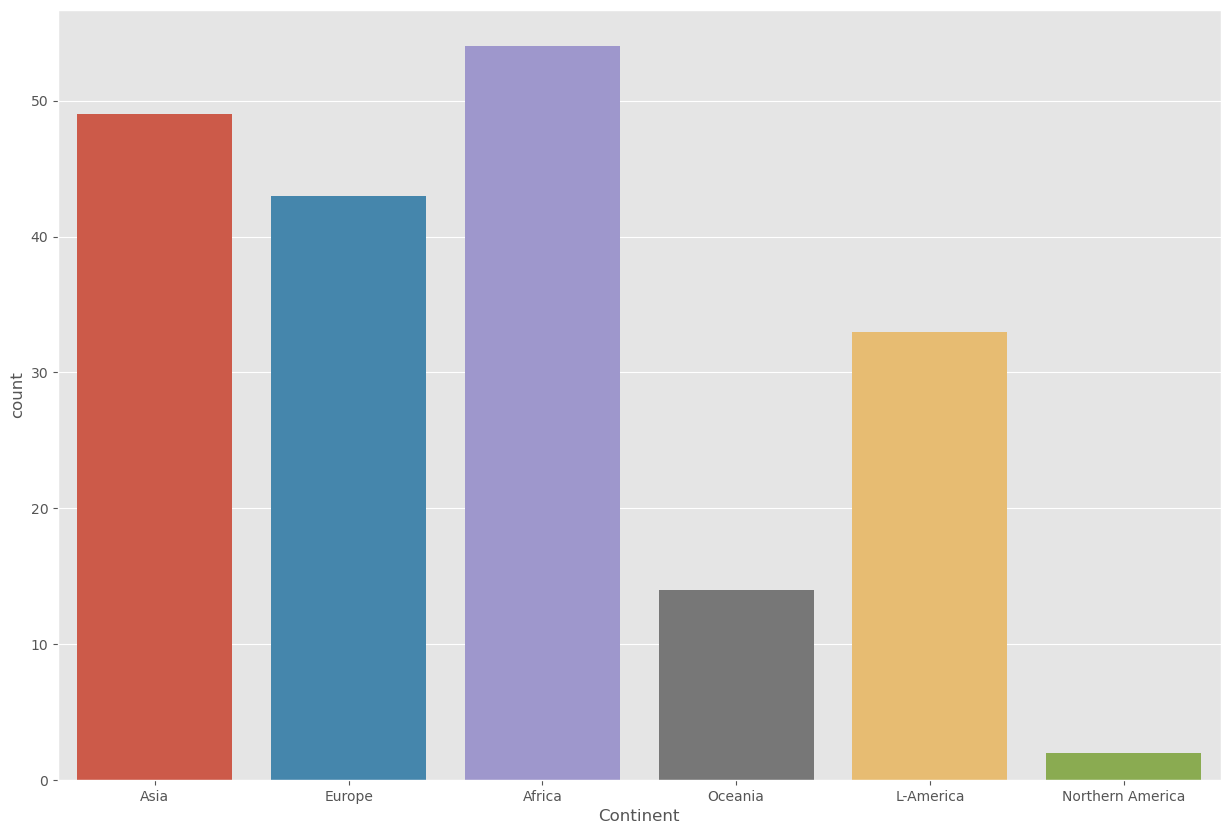

In [46]:
plt.figure(figsize = ( 15, 10))
sns.countplot(x= 'Continent', data = df_can1)

### Barplot
#### This plot will perform the Groupby on a categorical variable and plot aggregated values with confidence intervals.

Plot the total immigrants Continent-wise

<Axes: xlabel='Continent', ylabel='Total'>

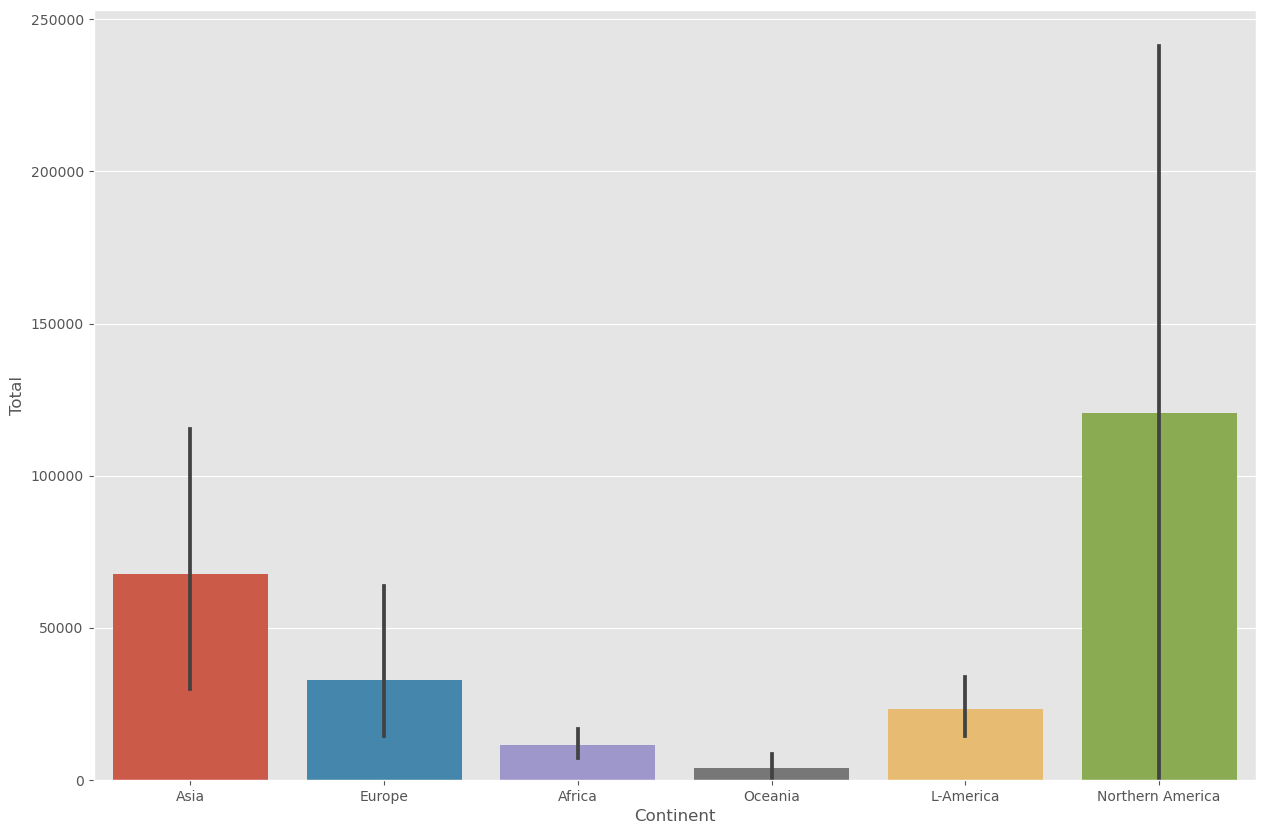

In [47]:
plt.figure(figsize = (15, 10))
sns.barplot(x='Continent', y = 'Total', data = df_can1)

###### 
Verify the values by performing the groupby on the Total and Continent for mean()

In [48]:
df_can2 = df_can1.groupby('Continent')['Total'].mean()
df_can2

Continent
Africa               11462.000000
Asia                 67710.081633
Europe               32812.720930
L-America            23186.303030
Northern America    120571.000000
Oceania               3941.000000
Name: Total, dtype: float64

# Regression Plot

###### 
Create a new dataframe that stores that total_number of landed immigrants to Canada per year form 1980 to 2013.


In [49]:
years = list(map(str, range(1980, 2014)))

# use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis =0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

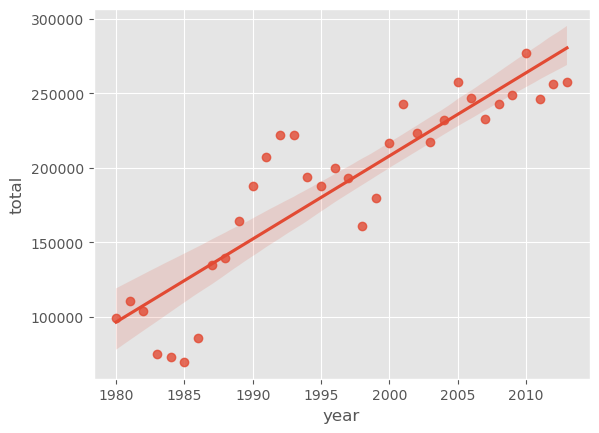

In [50]:
# Plot
sns.regplot(x='year', y='total', data = df_tot)


Change color

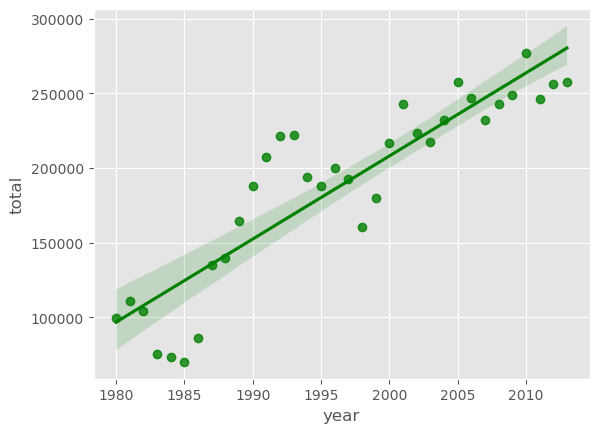

In [52]:
# Plot
sns.regplot(x='year', y='total', data = df_tot, color = 'green')
plt.show()

###### 
Customize marker shape

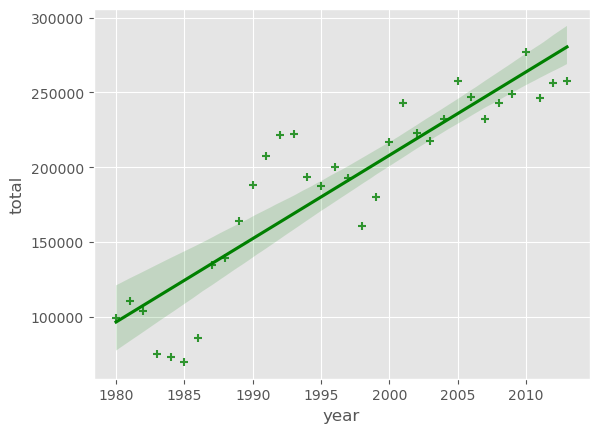

In [61]:
# Plot
sns.regplot(x='year', y='total', data = df_tot, color = 'green',
           marker = '+')
plt.show()

###### 
Blow up the plot a little to make it more appealing to the sight

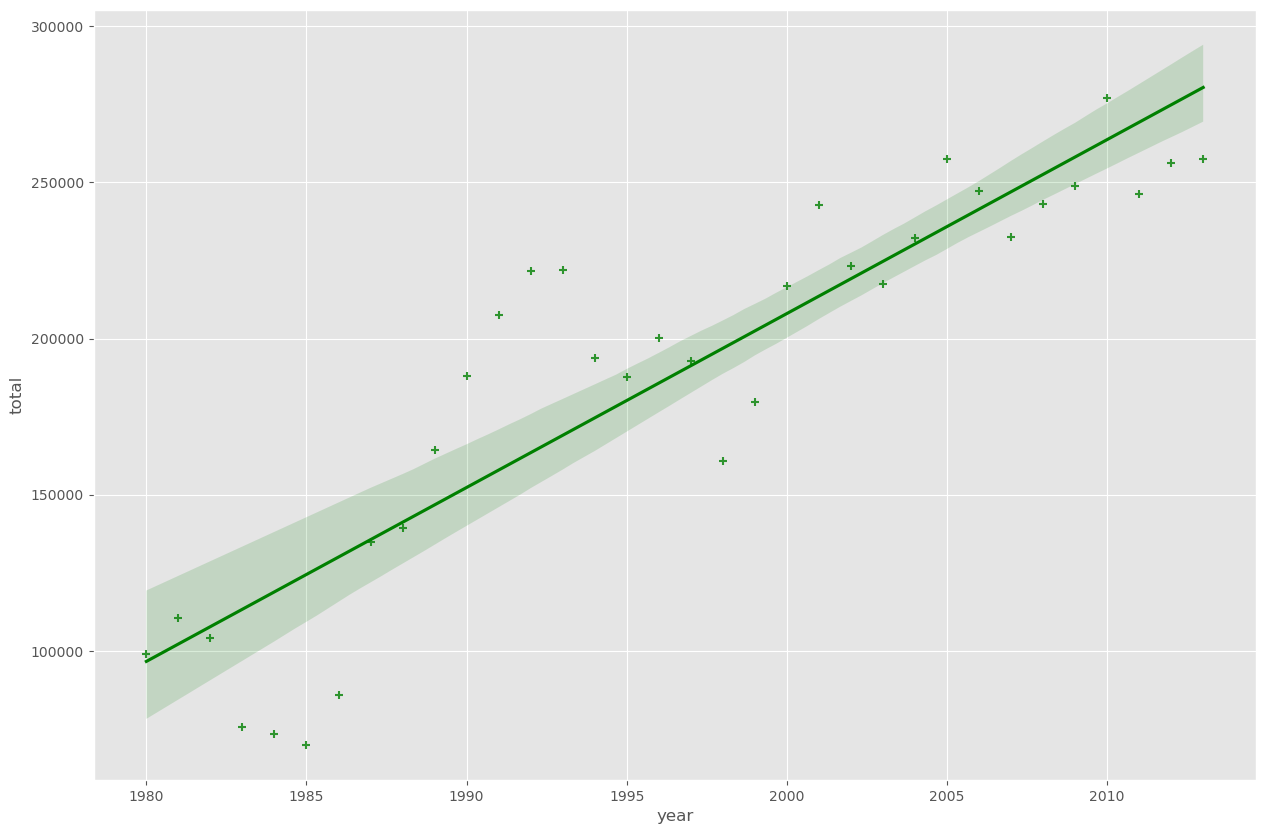

In [62]:
# Plot
plt.figure(figsize = (15, 10))
sns.regplot(x='year', y='total', data = df_tot, color = 'green',
           marker = '+')
plt.show()

Increase the size of markers to match the new size of the figure. Add a title and x- and y- labels.

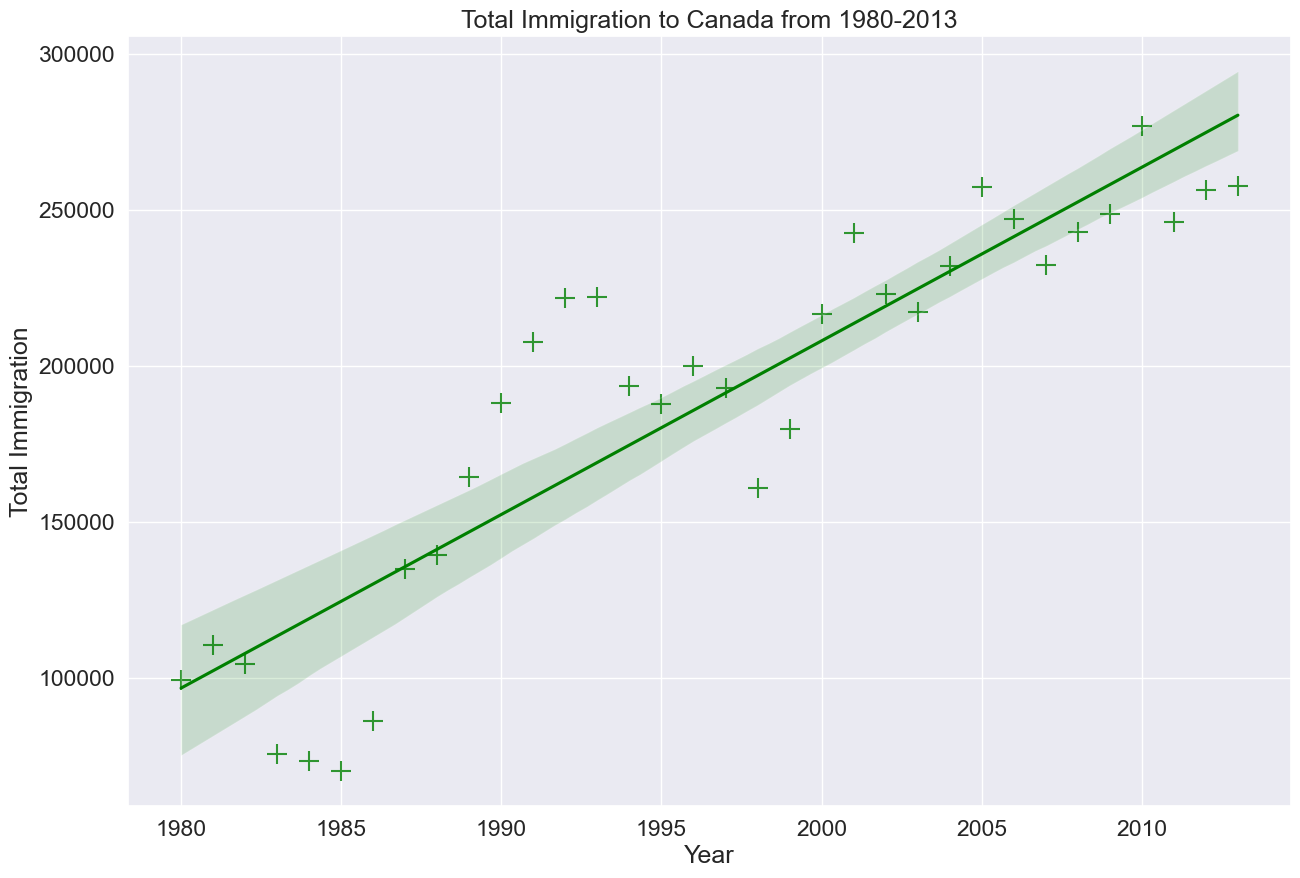

In [71]:
# Plot
plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.5)

ax = sns.regplot(x='year', y='total', data = df_tot, color = 'green',
           marker = '+', 
           scatter_kws = {'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

plt.show()

Change the style to a white plain background

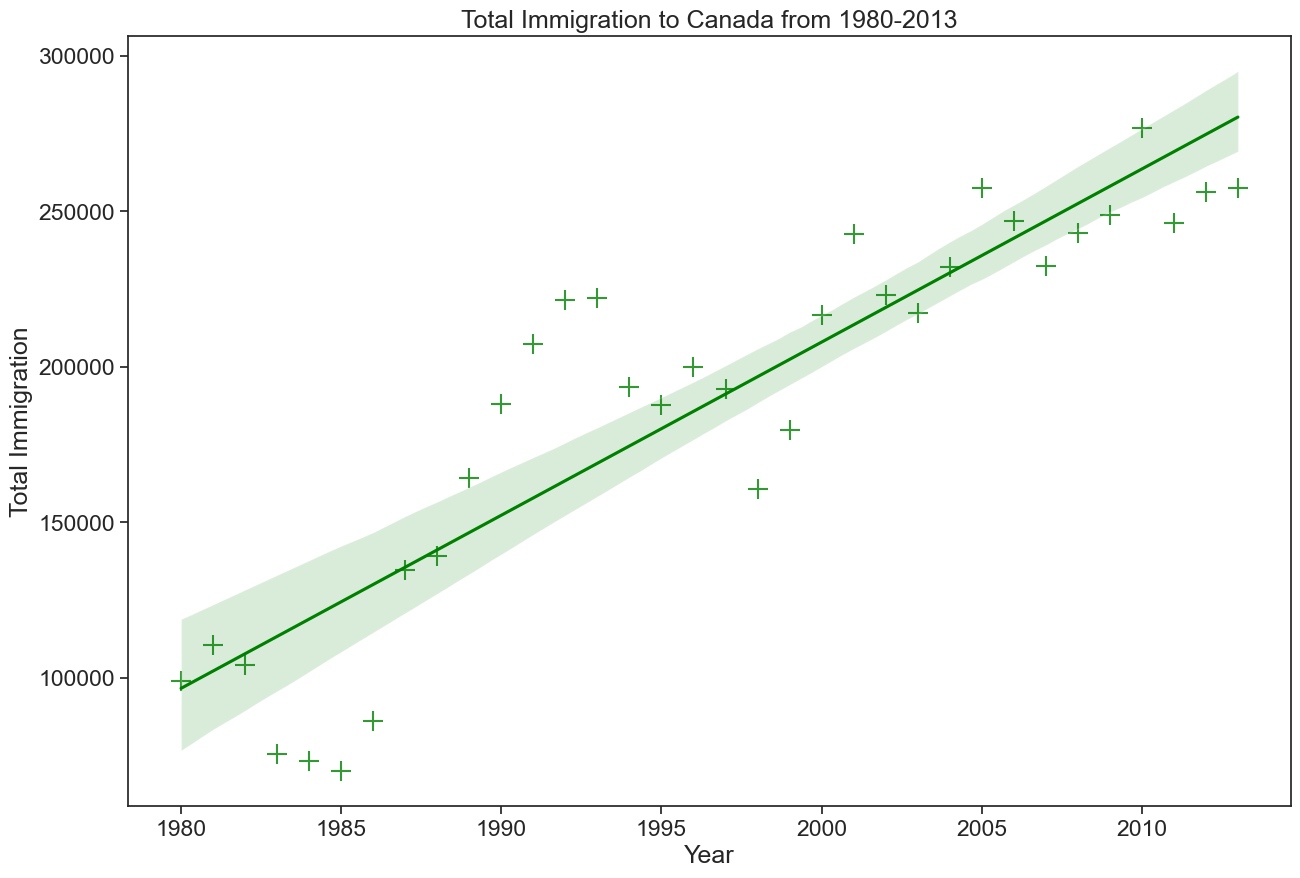

In [72]:
# Plot
plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data = df_tot, color = 'green',
           marker = '+', 
           scatter_kws = {'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

plt.show()

Or to a white background with gridlines

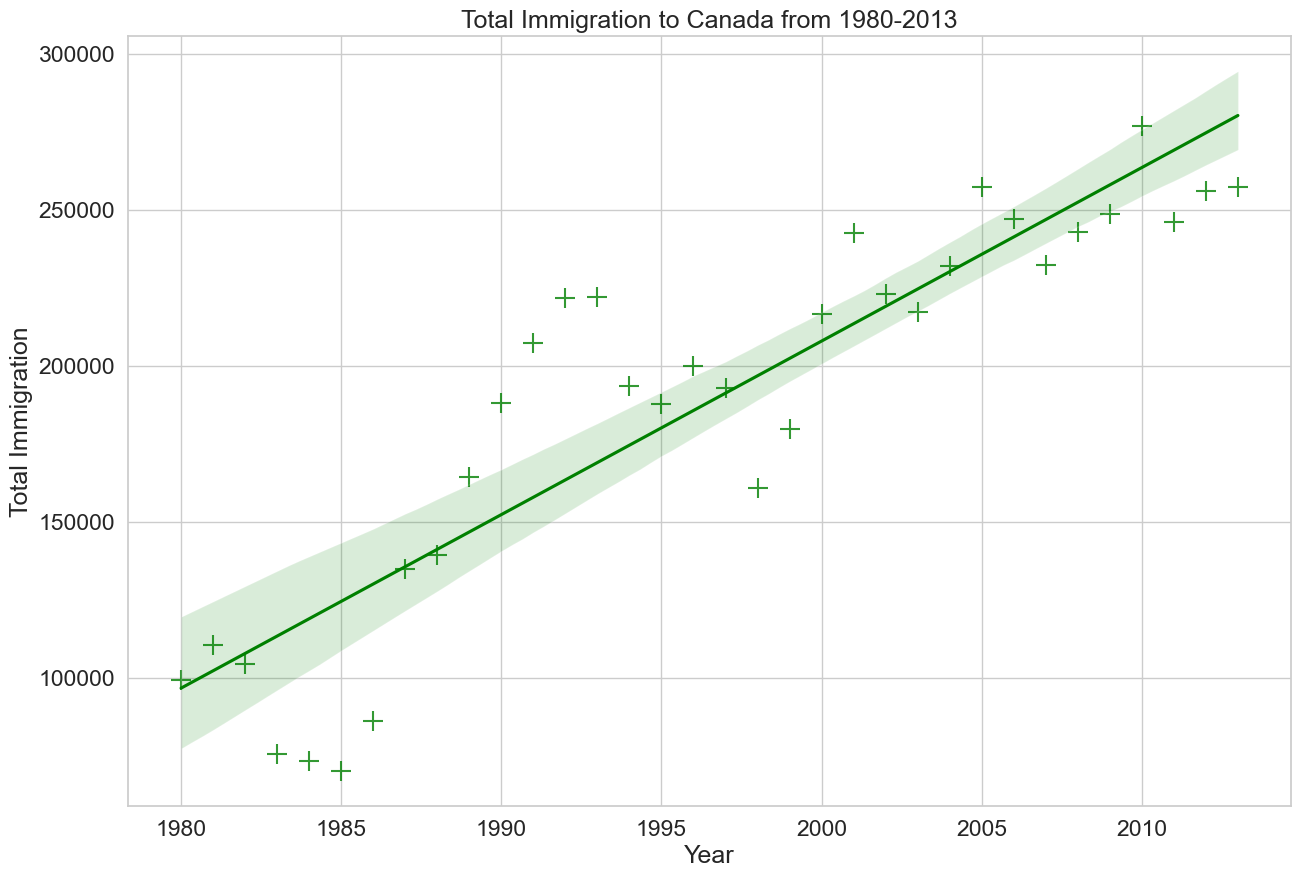

In [73]:
# Plot
plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data = df_tot, color = 'green',
           marker = '+', 
           scatter_kws = {'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

plt.show()

Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada form 1980 to 2013

In [81]:
df_dsn = df_can.loc[['Denmark', 'Sweden', 'Norway'], years].transpose()


In [83]:
df_total = pd.DataFrame(df_dsn.sum(axis=1))

In [85]:
df_total.reset_index(inplace = True)

In [87]:
df_total.columns = ['year', 'total'] # rename columns

In [89]:
# change column year form string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)


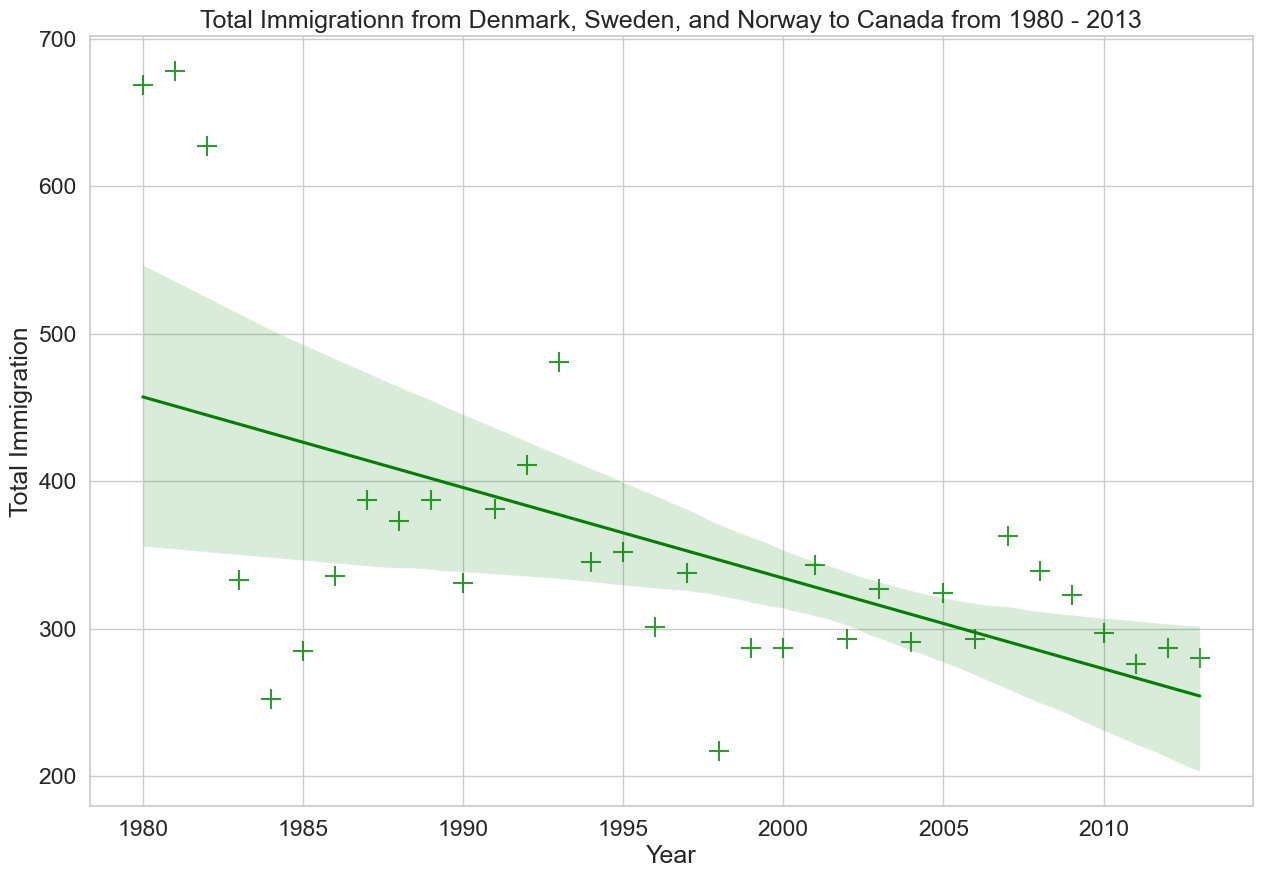

In [92]:
# Plot
plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data = df_total, color = 'green',
           marker = '+', 
           scatter_kws = {'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

plt.show()